In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('tested.csv')
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [12]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


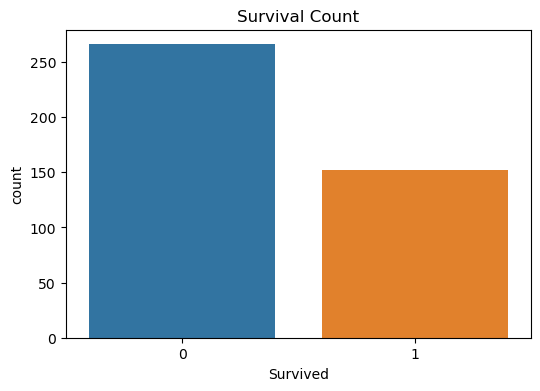

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

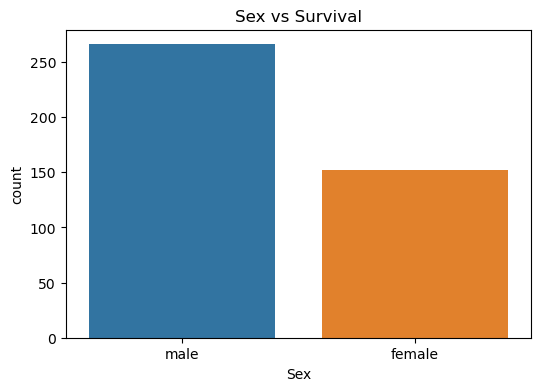

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex vs Survival')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


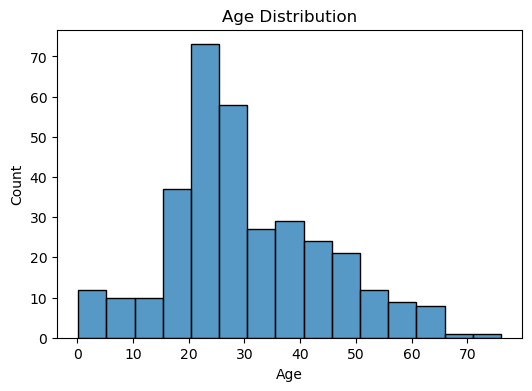

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

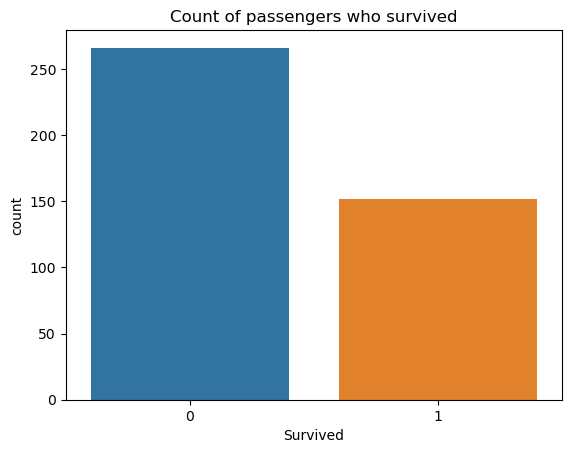

In [25]:
sns.countplot(x="Survived",data=df)
plt.title("Count of passengers who survived")
plt.show()

In [38]:
def find_max_missing_column(df):
    missing_counts = df.isnull().sum()
    if missing_counts.sum() == 0:
        return None, 0
    return missing_counts.idxmax(), missing_counts.max()
print( missing_counts.idxmax(), missing_counts.max())   

Cabin 327


In [39]:
df.drop(['Cabin'],axis=1,inplace=True)
print(df.shape)

(418, 11)


In [23]:
age_median = df['Age'].median()


In [24]:
df['Age'].fillna(age_median)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [42]:
df.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)

In [43]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df.corr())

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.108615 -1.000000 -0.000013  0.099943  0.159120   
Pclass   -0.108615  1.000000  0.108615 -0.492143  0.001087  0.018721   
Sex      -1.000000  0.108615  1.000000  0.000013 -0.099943 -0.159120   
Age      -0.000013 -0.492143  0.000013  1.000000 -0.091587 -0.061249   
SibSp     0.099943  0.001087 -0.099943 -0.091587  1.000000  0.306895   
Parch     0.159120  0.018721 -0.159120 -0.061249  0.306895  1.000000   
Fare      0.191514 -0.577147 -0.191514  0.337932  0.171539  0.230046   
Embarked -0.076281  0.227983  0.076281 -0.175848  0.052708  0.054577   

              Fare  Embarked  
Survived  0.191514 -0.076281  
Pclass   -0.577147  0.227983  
Sex      -0.191514  0.076281  
Age       0.337932 -0.175848  
SibSp     0.171539  0.052708  
Parch     0.230046  0.054577  
Fare      1.000000 -0.257183  
Embarked -0.257183  1.000000  


In [45]:
df["Age"]=df["Age"].replace(np.nan,0)
df["Embarked"]=df["Embarked"].replace(np.nan,0)
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.5      0      0    7.8292         1
1           1       3    0  47.0      1      0    7.0000         2
2           0       2    1  62.0      0      0    9.6875         1
3           0       3    1  27.0      0      0    8.6625         2
4           1       3    0  22.0      1      1   12.2875         2
..        ...     ...  ...   ...    ...    ...       ...       ...
413         0       3    1   0.0      0      0    8.0500         2
414         1       1    0  39.0      0      0  108.9000         0
415         0       3    1  38.5      0      0    7.2500         2
416         0       3    1   0.0      0      0    8.0500         2
417         0       3    1   0.0      1      1   22.3583         0

[418 rows x 8 columns]


In [46]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]
print("XXXX",x)
print("YYYY",y)

XXXX      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1   0.0      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1   0.0      0      0    8.0500         2
417       3    1   0.0      1      1   22.3583         0

[418 rows x 7 columns]
YYYY 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [48]:
print("DF",df.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_test.shape)
print("y_test",y_test.shape)

DF (418, 8)
x_train (334, 7)
x_test (84, 7)
y_train (84,)
y_test (84,)


In [49]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]
print(x_train.isnull().sum())  
print(y_train.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
0


In [50]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred=NB.predict(x_test)
print("y_pred",y_pred)
print('y_test',y_test)

y_pred [0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0]
y_test 289    0
258    1
392    0
6      1
296    1
      ..
137    0
350    1
283    1
325    0
357    0
Name: Survived, Length: 84, dtype: int64


In [52]:
from sklearn.metrics import accuracy_score
print("ACCURACY",accuracy_score(y_test,y_pred)*100,"%")

ACCURACY 100.0 %


In [54]:
testPrediction=NB.predict([[0,3,1,22.0,1,6,2]])
if testPrediction==1:
    print("Survived")
else:
    print("Dead")

Dead


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
